In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [2]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.integrate import quad
np.random.seed(42)

# Chi-squared Bridge

In [3]:
# functions

from scipy.special import gamma

def chi2_pdf(x, k):
    nom = x**(k/2 - 1) * np.exp(-x/2)
    den = 2**(k/2) * gamma_func(k/2)
    return(nom/den)

def chi2_t_log_pdf(x, k):
    nom = np.exp(x)**(k/2) * np.exp(-np.exp(x)/2)
    den = 2**(k/2) * gamma_func(k/2)
    return(nom/den)

def chi2_t_sqrt_pdf(x, k):
    nom = x**k * np.exp(-x**2/2)
    #den = 2**(k/2) * gamma_func(k/2)
    den = 2**((k-1)/2) * gamma_func((k+1)/2)
    return(nom/den)

def chi2_mu(k):
    return(np.max(k-2, 0))

def chi2_var(k):
    if k <= 2:
        #raise(ValueError('if k is equal to or lower than 2 you cannot fit a normal'))
        print('if k is equal to or lower than 2 you cannot fit a normal')
    return(2*(k-2))

"""Transforms: log"""

def chi2_t_log_mu(k):
    return(np.log(k))

def chi2_t_log_var(k):
    return(2/k)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)

"""Transforms: sqrt"""

def chi2_t_sqrt_mu(k):
    return(np.sqrt(k))

def chi2_t_sqrt_var(k):
    return(1/2)

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))

In [4]:
#change the basis

##########EXPONENTIAL#############

def plot_chi2_t_log(params, save=False, filename='chi2_log_bridge.pdf', show_back=True):

    #standard
    k1, k2, k3 = params

    x = np.linspace(0,10, 1000 +1)
    y1 = chi2_pdf(x, k1) 
    y2 = chi2_pdf(x, k2) 
    y3 = chi2_pdf(x, k3) 

    mode1 = chi2_mu(k1)
    mode2 = chi2_mu(k2)
    mode3 = chi2_mu(k3)

    sigma1 = np.sqrt(chi2_var(k1))
    sigma2 = np.sqrt(chi2_var(k2))
    sigma3 = np.sqrt(chi2_var(k3))

    approx1 = norm.pdf(x, mode1, sigma1)
    approx2 = norm.pdf(x, mode2, sigma2)
    approx3 = norm.pdf(x, mode3, sigma3)

    #log transform 

    x_t = np.linspace(-3, 4, 1000 +1)
    y1_t_log = chi2_t_log_pdf(x_t, k1) 
    y2_t_log = chi2_t_log_pdf(x_t, k2) 
    y3_t_log = chi2_t_log_pdf(x_t, k3) 

    mode1_t_log = chi2_t_log_mu(k1)
    mode2_t_log = chi2_t_log_mu(k2)
    mode3_t_log = chi2_t_log_mu(k3)

    sigma1_t_log = np.sqrt(chi2_t_log_var(k1))
    sigma2_t_log = np.sqrt(chi2_t_log_var(k2))
    sigma3_t_log = np.sqrt(chi2_t_log_var(k3))

    approx1_t_log = norm.pdf(x_t, loc=mode1_t_log, scale=sigma1_t_log)
    approx2_t_log = norm.pdf(x_t, loc=mode2_t_log, scale=sigma2_t_log)
    approx3_t_log = norm.pdf(x_t, loc=mode3_t_log, scale=sigma3_t_log)

    #back transform
    if show_back:
        y1_back = log_normal_back(x, mode1_t_log, sigma1_t_log) 
        y2_back = log_normal_back(x, mode2_t_log, sigma2_t_log) 
        y3_back = log_normal_back(x, mode3_t_log, sigma3_t_log) 

    #plots:
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times New Roman"
    legend_size=25
    xlabel_size=25
    ylabel_size=25
    title_size=25
    lw_size=3
    
    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
    else: 
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 4))
        
    axs[0].plot(x, y1, 'r-', lw=lw_size)
    axs[0].plot(x, y2, 'b-', lw=lw_size)
    axs[0].plot(x, y3, 'k-', lw=lw_size, label="$\chi^2$");
    axs[0].plot(x, approx1, 'r--', lw=lw_size)
    axs[0].plot(x, approx2, 'b--', lw=lw_size)
    axs[0].plot(x, approx3, 'k--', lw=lw_size, label="$\mathcal{N}$");
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    axs[1].plot(x_t, y1_t_log, 'r-', lw=lw_size)
    axs[1].plot(x_t, y2_t_log, 'b-', lw=lw_size)
    axs[1].plot(x_t, y3_t_log, 'k-', lw=lw_size, label="$\chi^2$");
    axs[1].plot(x_t, approx1_t_log, 'r--', lw=lw_size)
    axs[1].plot(x_t, approx2_t_log, 'b--', lw=lw_size)
    axs[1].plot(x_t, approx3_t_log, 'k--', lw=lw_size, label="$\mathcal{N}$");
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in log basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back: 
        axs[2].plot(x, y1, 'r-', lw=lw_size)
        axs[2].plot(x, y2, 'b-', lw=lw_size)
        axs[2].plot(x, y3, 'k-', lw=lw_size, label="$\chi^2$");
        axs[2].plot(x, y1_back, 'r--', lw=lw_size)
        axs[2].plot(x, y2_back, 'b--', lw=lw_size)
        axs[2].plot(x, y3_back, 'k--', lw=lw_size, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()

    if save:
        plt.savefig(filename)

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


if k is equal to or lower than 2 you cannot fit a normal


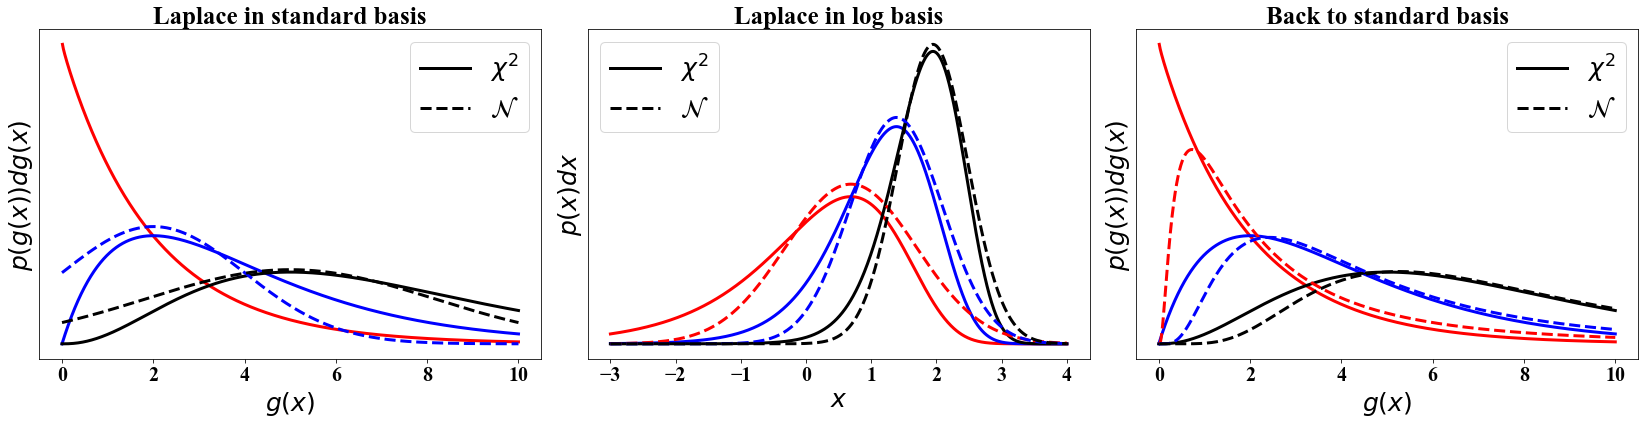

In [5]:
plot_chi2_t_log(params=[1.99, 4, 7], save=True, filename='chi2_log_bridge.pdf', show_back=True)

In [10]:
#change the basis

##############SQUARE###########

def plot_chi2_t_sqrt(params, save=False, filename='chi2_sqrt_bridge.pdf', show_back=True):

    #standard
    k1, k2, k3 = params
    x = np.linspace(0,10, 1000 +1)
    y1 = chi2_pdf(x, k1) 
    y2 = chi2_pdf(x, k2) 
    y3 = chi2_pdf(x, k3) 

    mode1 = chi2_mu(k1)
    mode2 = chi2_mu(k2)
    mode3 = chi2_mu(k3)

    sigma1 = np.sqrt(chi2_var(k1))
    sigma2 = np.sqrt(chi2_var(k2))
    sigma3 = np.sqrt(chi2_var(k3))

    approx1 = norm.pdf(x, mode1, sigma1)
    approx2 = norm.pdf(x, mode2, sigma2)
    approx3 = norm.pdf(x, mode3, sigma3)

    #transform 

    x_t = np.linspace(0, 5, 1000 +1)
    y1_t_sqrt = chi2_t_sqrt_pdf(x_t, k1) 
    y2_t_sqrt = chi2_t_sqrt_pdf(x_t, k2) 
    y3_t_sqrt = chi2_t_sqrt_pdf(x_t, k3) 

    mode1_t_sqrt = chi2_t_sqrt_mu(k1)
    mode2_t_sqrt = chi2_t_sqrt_mu(k2)
    mode3_t_sqrt = chi2_t_sqrt_mu(k3)

    sigma1_t_sqrt = np.sqrt(chi2_t_sqrt_var(k1))
    sigma2_t_sqrt = np.sqrt(chi2_t_sqrt_var(k2))
    sigma3_t_sqrt = np.sqrt(chi2_t_sqrt_var(k3))

    approx1_t_sqrt = norm.pdf(x_t, loc=mode1_t_sqrt, scale=sigma1_t_sqrt) 
    approx2_t_sqrt = norm.pdf(x_t, loc=mode2_t_sqrt, scale=sigma2_t_sqrt) 
    approx3_t_sqrt = norm.pdf(x_t, loc=mode3_t_sqrt, scale=sigma3_t_sqrt) 

    #back transform
    y1_back = sqrt_normal_back(x, mode1_t_sqrt, sigma1_t_sqrt) 
    y2_back = sqrt_normal_back(x, mode2_t_sqrt, sigma2_t_sqrt) 
    y3_back = sqrt_normal_back(x, mode3_t_sqrt, sigma3_t_sqrt) 

    #plots:
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = "Times New Roman"
    legend_size=25
    xlabel_size=25
    ylabel_size=25
    title_size=25
    lw_size=3
    
    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
    else: 
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 4))
        
    axs[0].plot(x, y1, 'r-', lw=lw_size)
    axs[0].plot(x, y2, 'b-', lw=lw_size)
    axs[0].plot(x, y3, 'k-', lw=lw_size, label="$\chi^2$");
    axs[0].plot(x, approx1, 'r--', lw=lw_size)
    axs[0].plot(x, approx2, 'b--', lw=lw_size)
    axs[0].plot(x, approx3, 'k--', lw=lw_size, label="$\mathcal{N}$");
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$g(x)$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=lw_size)
    axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=lw_size)
    axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=lw_size, label="$\chi^2$");
    axs[1].plot(x_t, approx1_t_sqrt, 'r--', lw=lw_size)
    axs[1].plot(x_t, approx2_t_sqrt, 'b--', lw=lw_size)
    axs[1].plot(x_t, approx3_t_sqrt, 'k--', lw=lw_size, label="$\mathcal{N}$");
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_xlabel('$x$', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_title('Laplace in log basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    if show_back: 
        axs[2].plot(x, y1, 'r-', lw=lw_size)
        axs[2].plot(x, y2, 'b-', lw=lw_size)
        axs[2].plot(x, y3, 'k-', lw=lw_size, label="$\chi^2$");
        axs[2].plot(x, y1_back, 'r--', lw=lw_size)
        axs[2].plot(x, y2_back, 'b--', lw=lw_size)
        axs[2].plot(x, y3_back, 'k--', lw=lw_size, label="$\mathcal{N}$")
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$g(x)$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=ylabel_size)
        axs[2].set_title('Back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()

    if save:
        plt.savefig(filename)

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide


if k is equal to or lower than 2 you cannot fit a normal


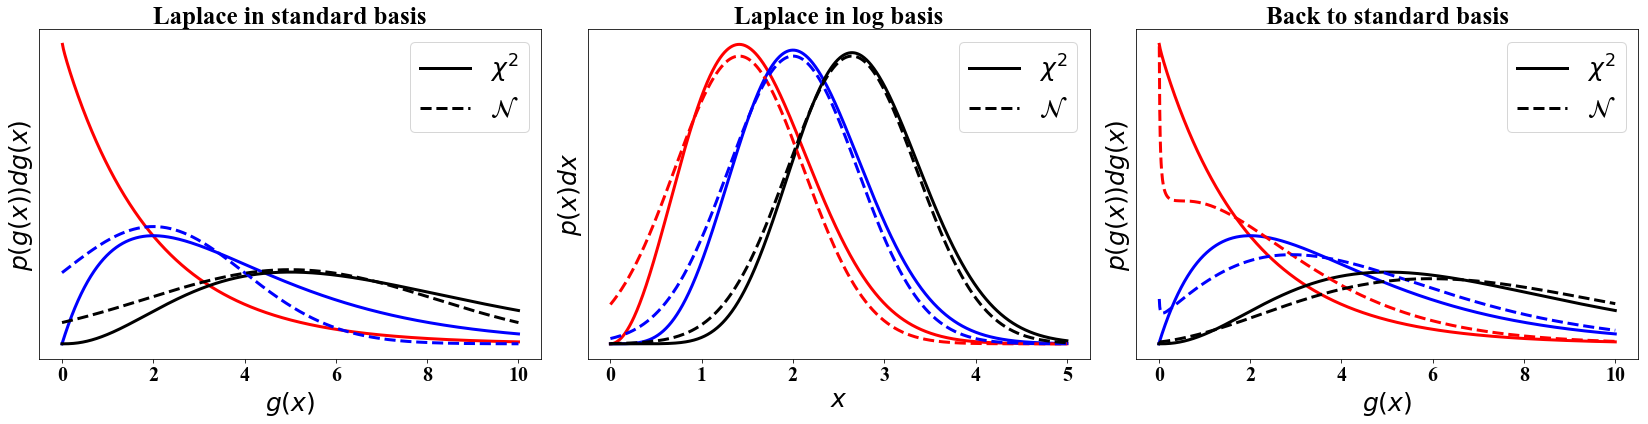

In [12]:
plot_chi2_t_sqrt(params=[1.99, 4, 7], save=True, filename='chi2_sqrt_bridge.pdf', show_back=True)

# verify the Bridges

In [43]:
#verify the log bridge

def chi2_t_log_k(m): 
    return(np.exp(m))


test_k1 = 3
test_m1, test_s1 = chi2_t_log_mu(test_k1), np.sqrt(chi2_t_log_var(test_k1))
test_k2 = chi2_t_log_k(test_m1)

print(test_k2)

rand_k1 = np.random.random()
rand_m1, rand_s1 = chi2_t_log_mu(rand_k1), np.sqrt(chi2_t_log_var(rand_k1))
rand_k2 = chi2_t_log_k(rand_m1)

assert(np.allclose(rand_k1, rand_k2))

3.0000000000000004


In [44]:
#verify the log bridge

def chi2_t_sqrt_k(m): 
    return(m**2)


test_k1 = 5
test_m1, test_s1 = chi2_t_sqrt_mu(test_k1), np.sqrt(chi2_t_sqrt_var(test_k1))
test_k2 = chi2_t_sqrt_k(test_m1)

print(test_k2)

rand_k1 = np.random.random()
rand_m1, rand_s1 = chi2_t_sqrt_mu(rand_k1), np.sqrt(chi2_t_sqrt_var(rand_k1))
rand_k2 = chi2_t_sqrt_k(rand_m1)

assert(np.allclose(rand_k1, rand_k2))

5.000000000000001


# Statistical distance measures

In [58]:
from torch_two_sample import MMDStatistic
from scipy.stats import norm, chi2
import torch

## MMD from 100 combinations of parameters

In [66]:
def MMD_combinations(params, plot=False, n_samples=1000, verbose=True):
    
    Ks = params
    
    MMD_sum = 0
    MMD_t_sqrt_sum = 0
    MMD_t_log_sum = 0 

    for k in Ks:
            
            if verbose:
                print("k: ", k)
                
            if k < 2:
                print("k < 2: not legitimate in standard base")
            
            #get samples from all dists
            #standard
            C2_samples = chi2.rvs(k, size=n_samples)
            if k >= 2:                
                mode1 = chi2_mu(k)
                sigma1 = np.sqrt(chi2_var(k))
                N_samples = norm.rvs(mode1, sigma1, size=n_samples)
            
            #log
            mode1_log = chi2_t_log_mu(k)
            sigma1_log = np.sqrt(chi2_t_log_var(k))
            C2_samples_log = np.log(C2_samples)
            N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)
            
            #sqrt
            mode1_sqrt = chi2_t_sqrt_mu(k)
            sigma1_sqrt = np.sqrt(chi2_t_sqrt_var(k))
            C2_samples_sqrt = np.sqrt(C2_samples)
            N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)
            
            
            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)
            
            #standard
            C2_samples_ = torch.Tensor(C2_samples.reshape((n_samples, -1)))
            if k >= 2:
                N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
                MMD_ = MMD(C2_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
            else:
                MMD_ = torch.Tensor([np.nan])
                
            #log
            C2_samples_log_ = torch.Tensor(C2_samples_log.reshape((n_samples, -1)))
            N_samples_log_ = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
            MMD_log_= MMD(C2_samples_log_, N_samples_log_,  alphas=[0.5], ret_matrix=False)
            
            #sqrt
            C2_samples_sqrt_ = torch.Tensor(C2_samples_sqrt.reshape((n_samples, -1)))
            N_samples_sqrt_ = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
            MMD_sqrt_ = MMD(C2_samples_sqrt_, N_samples_sqrt_,  alphas=[0.5], ret_matrix=False)

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
                axs[0].hist(C2_samples, bins = n_bins, alpha=0.5, label='$\chi^2$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()
                
                axs[1].hist(C2_samples_log, bins = n_bins, alpha=0.5, label='$\chi^2$')
                axs[1].hist(N_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('log basis')
                axs[1].legend()
                
                axs[2].hist(C2_samples_sqrt, bins = n_bins, alpha=0.5, label='$\chi^2$')
                axs[2].hist(N_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[2].set_title('sqrt basis')
                axs[2].legend()
                
                plt.show()
                
            if verbose: 
                print("standard: ", MMD_.item(), "log: ", MMD_log_.item(), "sqrt: ", MMD_sqrt_.item())

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_log_sum += MMD_log_
            MMD_t_sqrt_sum += MMD_sqrt_
            
    return(MMD_sum.item(), MMD_t_log_sum.item(), MMD_t_sqrt_sum.item())

In [67]:
MMD_combinations(params=range(2, 12), plot=False, verbose=True, n_samples=2000)

k:  2
if k is equal to or lower than 2 you cannot fit a normal
standard:  0.5418531894683838 log:  0.027520835399627686 sqrt:  0.023730874061584473
k:  3
standard:  0.107369065284729 log:  0.019991934299468994 sqrt:  0.011485576629638672
k:  4
standard:  0.048886269330978394 log:  0.01683354377746582 sqrt:  0.013836860656738281
k:  5
standard:  0.03236955404281616 log:  0.010996341705322266 sqrt:  0.006643474102020264
k:  6
standard:  0.021276146173477173 log:  0.009264528751373291 sqrt:  0.0011376738548278809
k:  7
standard:  0.016153573989868164 log:  0.004251301288604736 sqrt:  0.002815425395965576
k:  8
standard:  0.012696325778961182 log:  0.00615304708480835 sqrt:  0.004324078559875488
k:  9
standard:  0.009404599666595459 log:  0.0038048624992370605 sqrt:  0.005535900592803955
k:  10
standard:  0.005925595760345459 log:  0.007038593292236328 sqrt:  0.006086170673370361
k:  11
standard:  0.005814447999000549 log:  0.005768299102783203 sqrt:  0.0033389925956726074


(0.8017488121986389, 0.11162328720092773, 0.07893502712249756)

In [68]:
results_MMD = np.array([0.8017488121986389, 0.11162328720092773, 0.07893502712249756])
results_MMD_normed = results_MMD/results_MMD[0]
print(results_MMD_normed)

[1.         0.13922476 0.09845356]


## KL-divergence (mode seeking/backward, from PDF)

In [97]:
def normal_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)**2/sigma**2)))

In [98]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_pdf(x_linspace, pdf_1, pdf_2, plot=False):
    
    pdf_1[pdf_1 < 1e-6] = 1e-6
    pdf_2[pdf_2 < 1e-6] = 1e-6
    
    #calculate KL_div
    KL_div = (pdf_1 * np.log(pdf_1 / pdf_2))
    
    #fill NaNs with 0
    KL_div = np.nan_to_num(KL_div)

    if plot:
        plt.plot(x_linspace, pdf_1, label='pdf_1')
        plt.plot(x_linspace, pdf_2, label='pdf_2')
        plt.plot(x_linspace, KL_div, lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(np.abs(KL_div))
        
    return(KL_div)

In [99]:
def adjust_dist(k, base='standard'):
    
    #base can be any of "standard", "sqrtm" or "log"
    
    if base == "log":
        x_large = np.linspace(-1000, 1000, 2000)
    else:
        x_large = np.linspace(0.0001, 1000, 1000)
        
    if base == "standard":
        
        mode = chi2_mu(k)
        sigma = np.sqrt(chi2_var(k))
        
        #get the range of x
        C2_pdf_large = chi2_pdf(x_large, k)
        N_pdf_large = normal_pdf(x_large, mode, sigma)
        upper = np.max([np.sum(C2_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        C2_pdf = chi2_pdf(x_plus, k)
        N_pdf = normal_pdf(x_plus, mode, sigma)
        
        return(x_plus, C2_pdf, N_pdf)
    
    if base == "sqrt":
        
        mode_sqrt = chi2_t_sqrt_mu(k)
        sigma_sqrt = np.sqrt(chi2_t_sqrt_var(k))
        
        #get the range of x
        C2_pdf_large = chi2_t_sqrt_pdf(x_large, k)
        N_pdf_large = normal_pdf(x_large, mode_sqrt, sigma_sqrt)
        upper = np.max([np.sum(C2_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        C2_pdf = chi2_t_sqrt_pdf(x_plus, k)
        N_pdf = normal_pdf(x_plus, mode_sqrt, sigma_sqrt)
        
        return(x_plus, C2_pdf, N_pdf)
    
    if base == "log":
        
        mode_log = chi2_t_log_mu(k)
        sigma_log = np.sqrt(chi2_t_log_var(k))
        
        #get the range of x
        C2_pdf_large = chi2_t_log_pdf(x_large, k)
        N_pdf_large = normal_pdf(x_large, mode_log, sigma_log)
        range_ = np.max([np.sum(C2_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        lower = mode_log - range_/2
        upper = mode_log + range_/2
        x = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        C2_pdf = chi2_t_log_pdf(x, k)
        N_pdf = normal_pdf(x, mode_log, sigma_log)
        
        return(x, C2_pdf, N_pdf)
        

In [100]:
def KL_div_pdf_combinations(params, plot=False, verbose=True):
    
    Ks = params
    
    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for k in Ks:
            
        if verbose:
            print("k: ", k)

        if k < 2:
            print("k < 1: not legitimate in standard base")

        #get the ranges and pdfs
        if k >= 2:
            x, C2_pdf, N_pdf = adjust_dist(k, 'standard')
        x_sqrt, C2_pdf_sqrt, N_pdf_sqrt = adjust_dist(k, 'sqrt')
        x_log, C2_pdf_log, N_pdf_log = adjust_dist(k, 'log')

        #calculate the KL divergences for all bases
        if k >= 2:
            KL_div_ = KL_divergence_pdf(x, C2_pdf, N_pdf, plot=plot)
        else:
            KL_div_ = np.nan
        KL_div_log_ = KL_divergence_pdf(x_log, C2_pdf_log, N_pdf_log, plot=plot)
        KL_div_sqrt_ = KL_divergence_pdf(x_sqrt, C2_pdf_sqrt, N_pdf_sqrt, plot=plot) 

        #add them to their respective sums
        if k >= 2:
            KL_div_sum += KL_div_
        else:
            KL_div_sum += np.nan

        KL_div_t_log_sum += KL_div_log_
        if not np.isnan(KL_div_sqrt_):
            KL_div_t_sqrt_sum += KL_div_sqrt_
        else:
            print("Value was NaN, added constant 100")
            KL_div_t_sqrt_sum += 100

        if verbose:
            print("standard: ", KL_div_, "log: ", KL_div_log_, "sqrt: ", KL_div_sqrt_)
            
            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

k:  2
if k is equal to or lower than 2 you cannot fit a normal


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning:

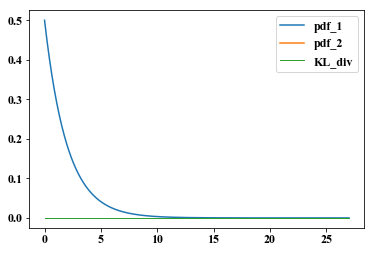

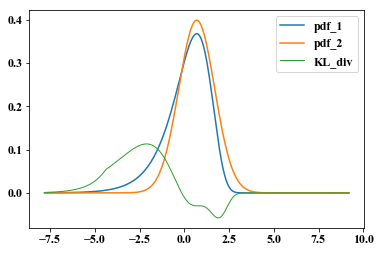

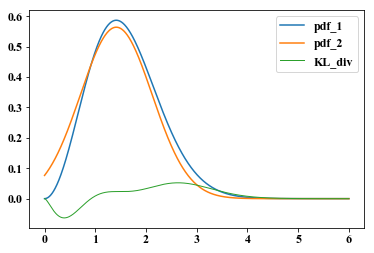

standard:  0.0 log:  28.66954177678226 sqrt:  21.78291221107305
k:  3


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in power
  # This is added back by InteractiveShellApp.init_path()


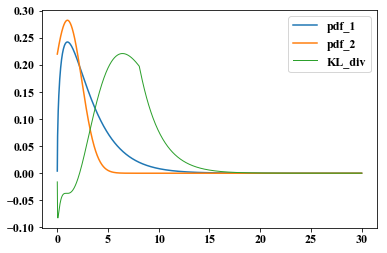

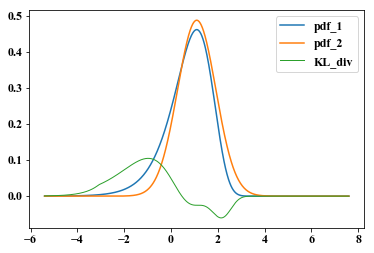

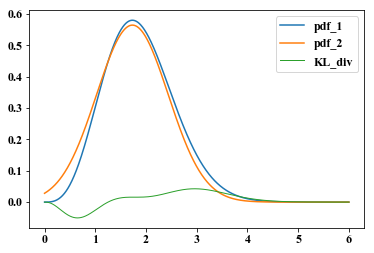

standard:  47.374287026654144 log:  26.50117365408598 sqrt:  18.074902918694157
k:  4


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()


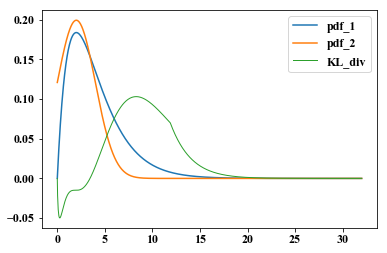

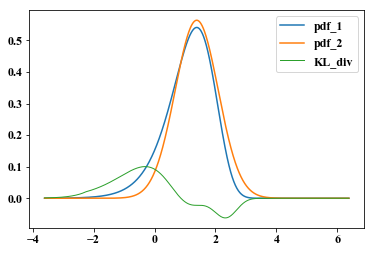

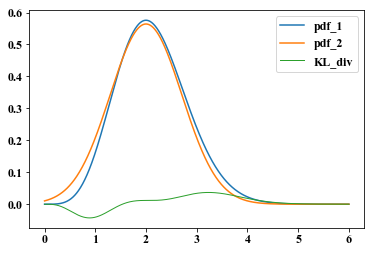

standard:  26.612916973277308 log:  27.28122425606562 sqrt:  15.777392354465434
k:  5


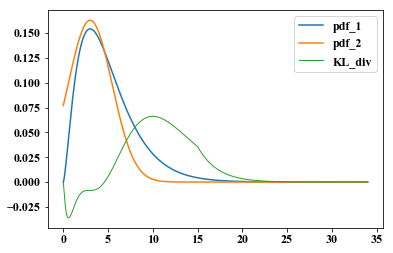

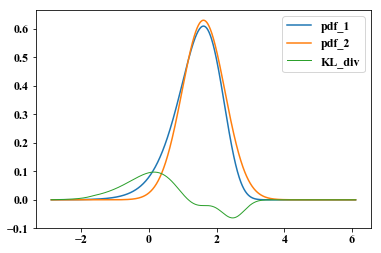

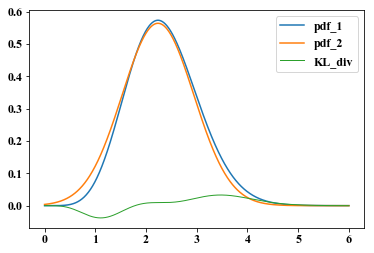

standard:  18.570549293461728 log:  25.555900520332365 sqrt:  14.170089204364189
k:  6


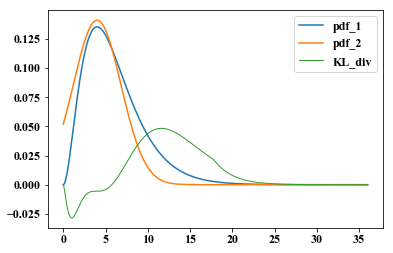

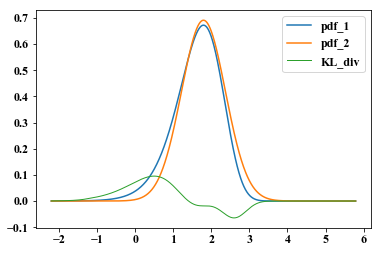

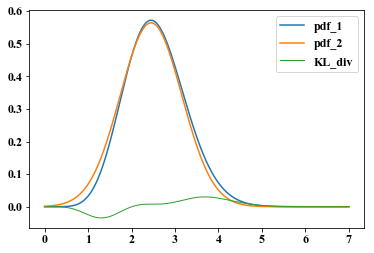

standard:  14.261003201226094 log:  25.145055679800826 sqrt:  11.113841739989152
k:  7


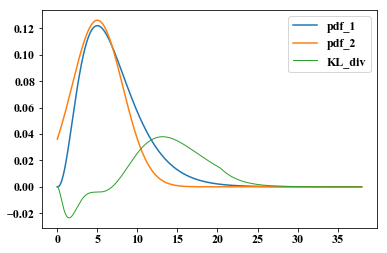

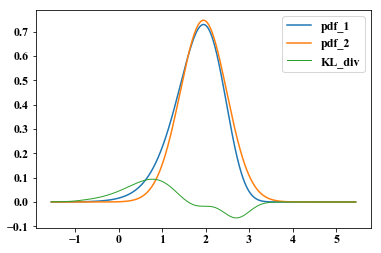

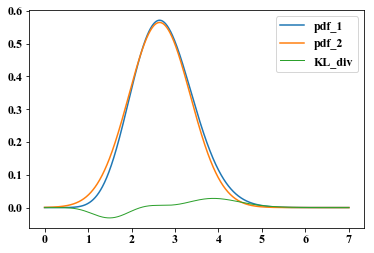

standard:  11.558194932041692 log:  25.754810224669736 sqrt:  10.30295019694293
k:  8


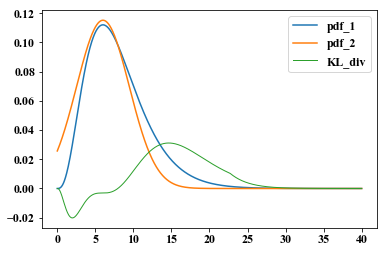

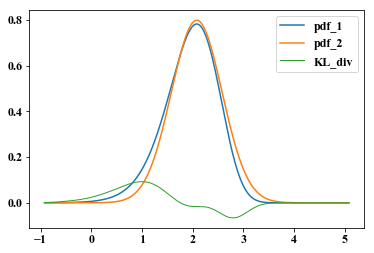

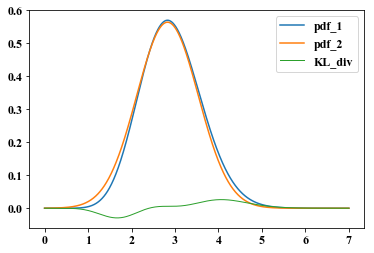

standard:  9.696974862109325 log:  27.38402055864509 sqrt:  9.644599253917622
k:  9


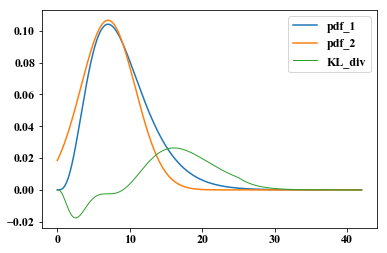

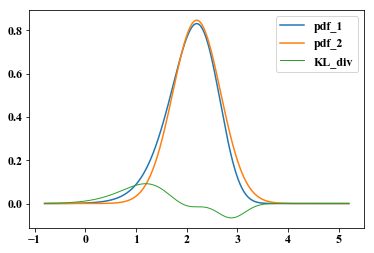

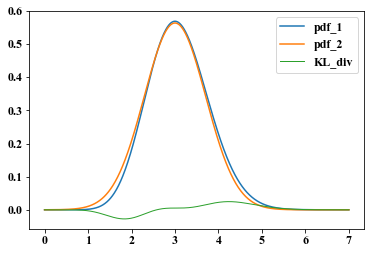

standard:  8.333535245678636 log:  25.328301084471317 sqrt:  9.09648589819404
k:  10


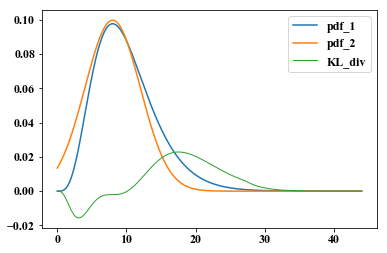

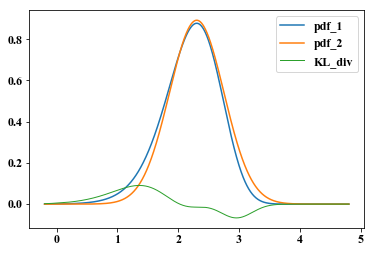

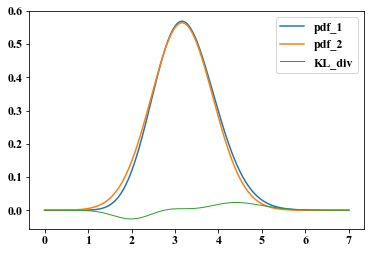

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  11


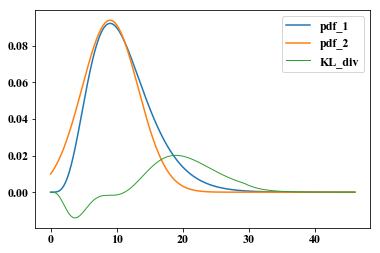

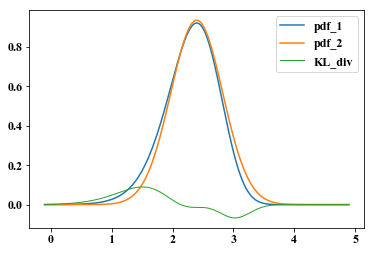

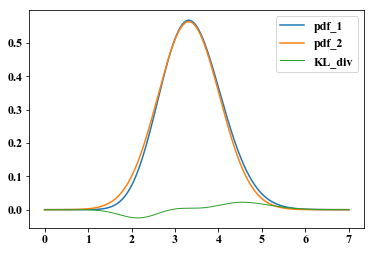

standard:  6.465318945378281 log:  26.657438565646004 sqrt:  8.229239280368986
(150.16295712503577, 266.58512036545505, 126.8234556075853)


In [101]:
print(KL_div_pdf_combinations(params=range(2, 12), plot=True, verbose=True))

In [83]:
results_KL_pdf = np.array([118.35709727592149, 111.33567386797854, 378.57972326808874])
results_KL_pdf_normed = results_KL_pdf/results_KL_pdf[0]
print(results_KL_pdf_normed)

[1.         0.94067594 3.19862291]


# Statistical distance measures for small, medium and large $\theta$

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide


if k is equal to or lower than 2 you cannot fit a normal
if k is equal to or lower than 2 you cannot fit a normal


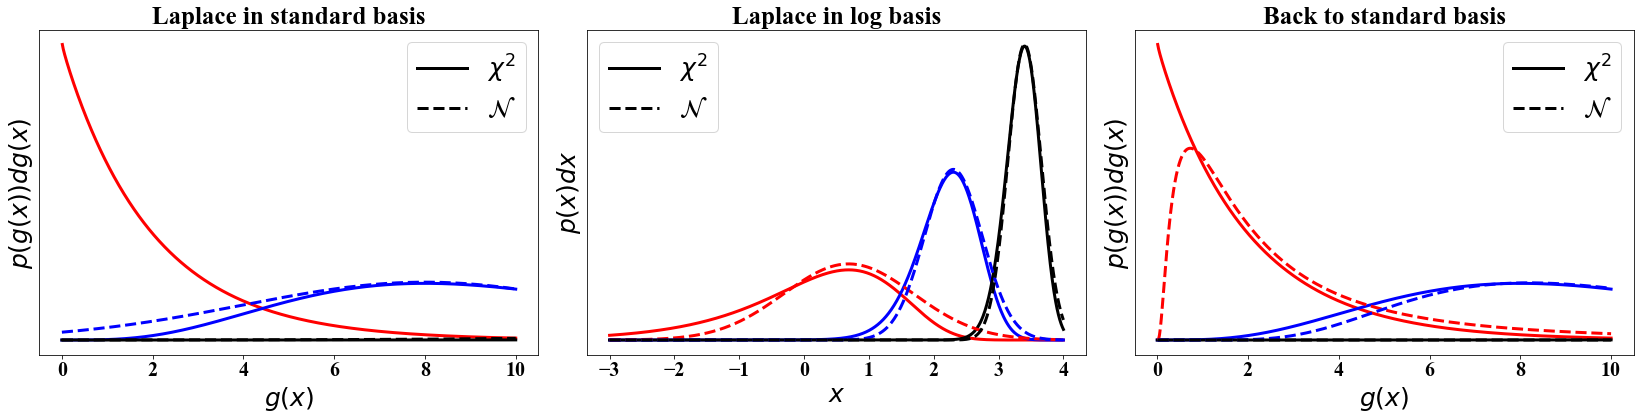

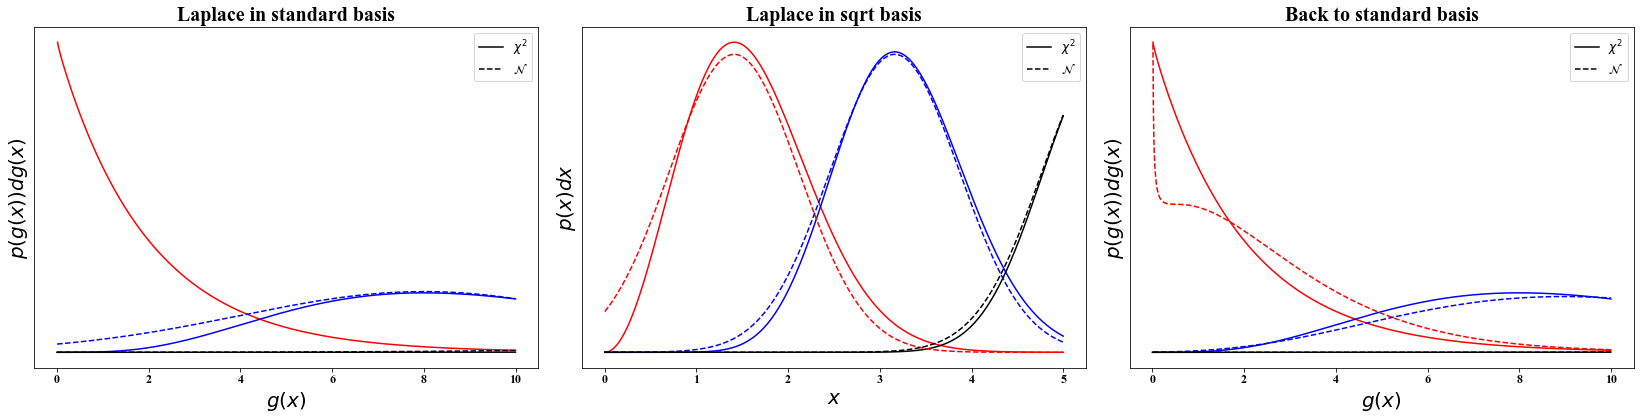

In [110]:
k_s = 1.99
k_m = 10
k_l = 30
plot_chi2_t_log(params=[k_s, k_m, k_l])
plot_chi2_t_sqrt(params=[k_s, k_m, k_l])

## calculate MMD for the three pairs of parameters

In [112]:
# use 10 seeds
MMD_results_s = []
MMD_results_m = []
MMD_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    torch.manual_seed(s)
    MMD_s = MMD_combinations(params = [k_s], n_samples=2000)
    MMD_m = MMD_combinations(params = [k_m], n_samples=2000)
    MMD_l = MMD_combinations(params = [k_l], n_samples=2000)
    MMD_results_s += [MMD_s]
    MMD_results_m += [MMD_m]
    MMD_results_l += [MMD_l]
    
MMD_results_mean_s = np.array(MMD_results_s).mean(0)
MMD_results_mean_m = np.array(MMD_results_m).mean(0)
MMD_results_mean_l = np.array(MMD_results_l).mean(0)
print(MMD_results_mean_s)
print(MMD_results_mean_m)
print(MMD_results_mean_l)

seed:  0
k:  1.99
k < 2: not legitimate in standard base
standard:  nan log:  0.0244596004486084 sqrt:  0.015960693359375
k:  10
standard:  0.010065421462059021 log:  0.005020797252655029 sqrt:  0.007165133953094482
k:  30
standard:  0.0008122101426124573 log:  0.0009495019912719727 sqrt:  0.0007211565971374512
seed:  1
k:  1.99
k < 2: not legitimate in standard base
standard:  nan log:  0.028124749660491943 sqrt:  0.013895153999328613
k:  10
standard:  0.0077158063650131226 log:  0.00208282470703125 sqrt:  0.003982484340667725
k:  30
standard:  0.002005748450756073 log:  0.0013707280158996582 sqrt:  0.0011823177337646484
seed:  2
k:  1.99
k < 2: not legitimate in standard base
standard:  nan log:  0.029652893543243408 sqrt:  0.019095540046691895
k:  10
standard:  0.008508294820785522 log:  0.005639016628265381 sqrt:  0.004359841346740723
k:  30
standard:  0.001771576702594757 log:  0.0007814168930053711 sqrt:  0.0002694129943847656
seed:  3
k:  1.99
k < 2: not legitimate in standard b

In [113]:
# normalize to 1 for comparison
MMD_results_mean_s[0] = MMD_results_mean_s[1:].max()
MMD_results_mean_s_normalized = MMD_results_mean_s/MMD_results_mean_s.max()
MMD_results_mean_s_normalized[0] = np.nan
print(MMD_results_mean_s_normalized)
print(MMD_results_mean_m/MMD_results_mean_m.max())
print(MMD_results_mean_l/MMD_results_mean_l.max())

[       nan 1.         0.73829013]
[1.         0.59897248 0.48678649]
[1.         0.45513803 0.45223631]


## calculate KL div for the three pairs of parameters

seed:  0
k:  1.99
k < 1: not legitimate in standard base
standard:  nan log:  28.793865117509647 sqrt:  21.832351410754864
k:  10


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in power
  # This is added back by InteractiveShellApp.init_path()


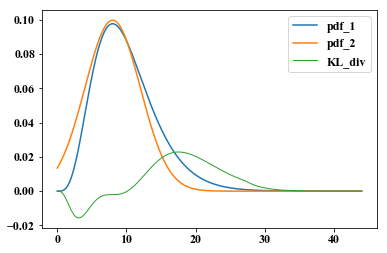

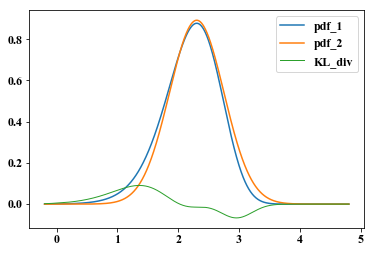

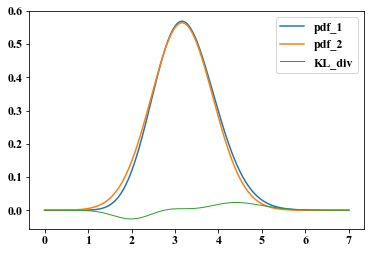

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  30
standard:  2.076527335221883 log:  24.494046177272814 sqrt:  4.294977157177461
seed:  1
k:  1.99
k < 1: not legitimate in standard base
standard:  nan log:  28.793865117509647 sqrt:  21.832351410754864
k:  10


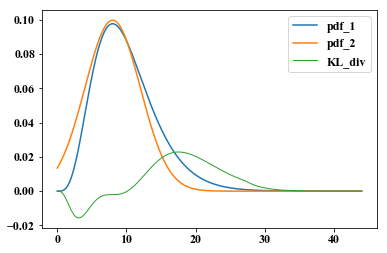

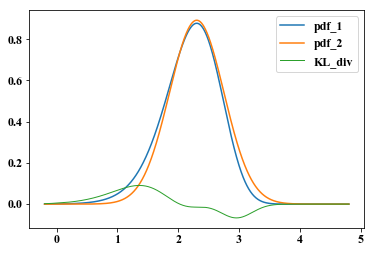

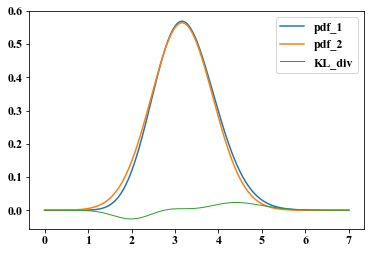

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  30
standard:  2.076527335221883 log:  24.494046177272814 sqrt:  4.294977157177461
seed:  2
k:  1.99
k < 1: not legitimate in standard base
standard:  nan log:  28.793865117509647 sqrt:  21.832351410754864
k:  10


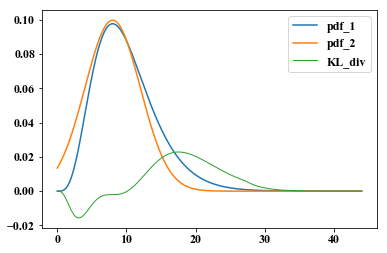

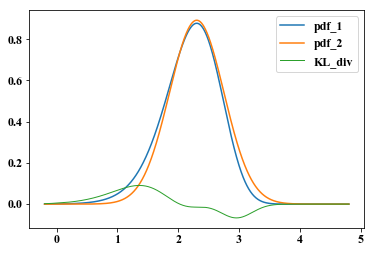

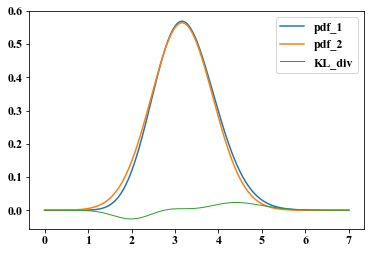

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  30
standard:  2.076527335221883 log:  24.494046177272814 sqrt:  4.294977157177461
seed:  3
k:  1.99
k < 1: not legitimate in standard base
standard:  nan log:  28.793865117509647 sqrt:  21.832351410754864
k:  10


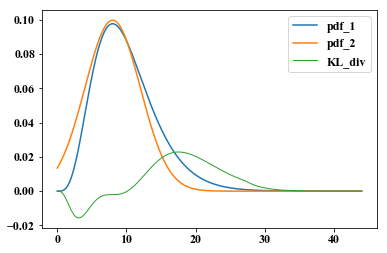

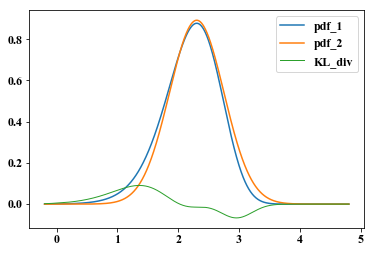

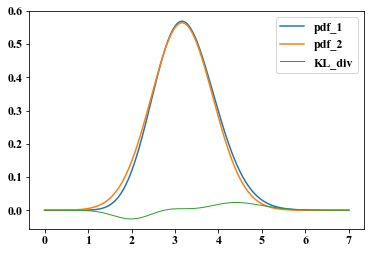

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  30
standard:  2.076527335221883 log:  24.494046177272814 sqrt:  4.294977157177461
seed:  4
k:  1.99
k < 1: not legitimate in standard base
standard:  nan log:  28.793865117509647 sqrt:  21.832351410754864
k:  10


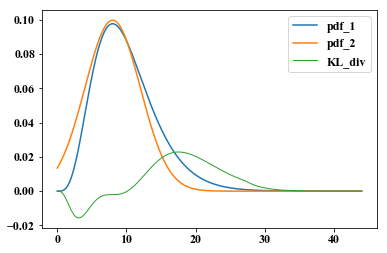

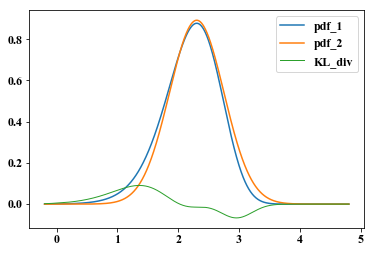

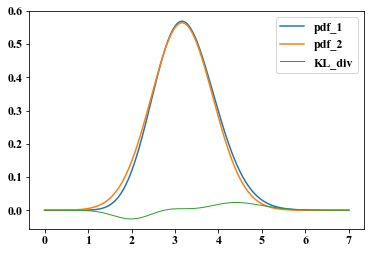

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  30
standard:  2.076527335221883 log:  24.494046177272814 sqrt:  4.294977157177461
seed:  5
k:  1.99
k < 1: not legitimate in standard base
standard:  nan log:  28.793865117509647 sqrt:  21.832351410754864
k:  10


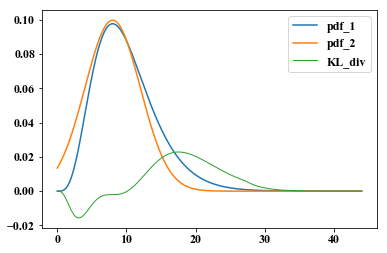

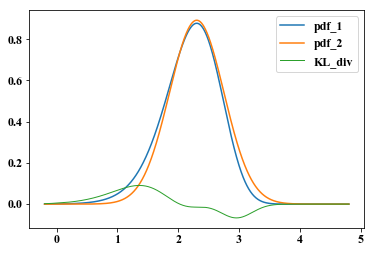

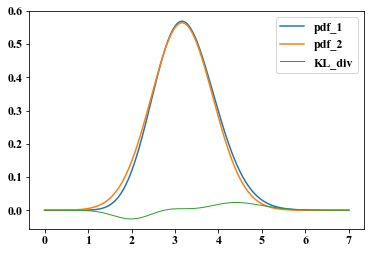

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  30
standard:  2.076527335221883 log:  24.494046177272814 sqrt:  4.294977157177461
seed:  6
k:  1.99
k < 1: not legitimate in standard base
standard:  nan log:  28.793865117509647 sqrt:  21.832351410754864
k:  10


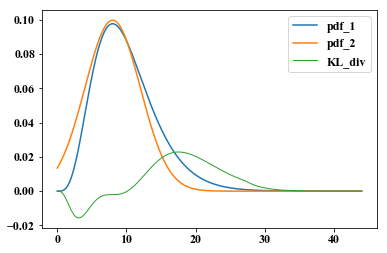

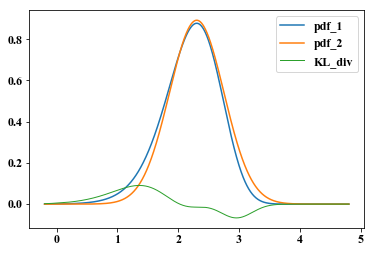

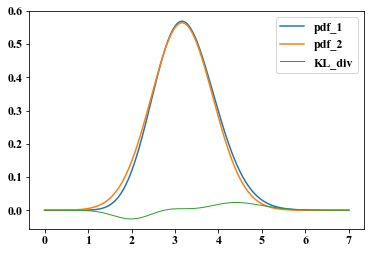

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  30
standard:  2.076527335221883 log:  24.494046177272814 sqrt:  4.294977157177461
seed:  7
k:  1.99
k < 1: not legitimate in standard base
standard:  nan log:  28.793865117509647 sqrt:  21.832351410754864
k:  10


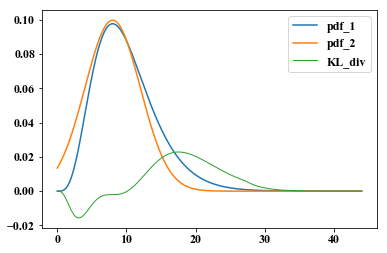

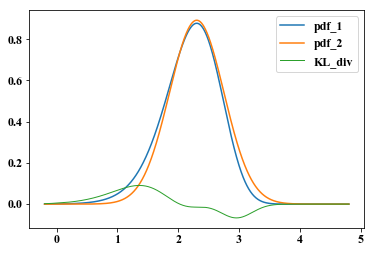

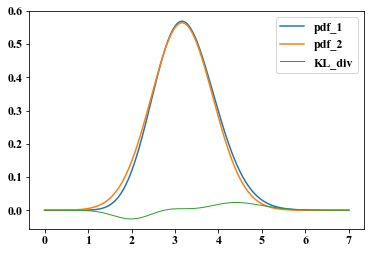

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  30
standard:  2.076527335221883 log:  24.494046177272814 sqrt:  4.294977157177461
seed:  8
k:  1.99
k < 1: not legitimate in standard base
standard:  nan log:  28.793865117509647 sqrt:  21.832351410754864
k:  10


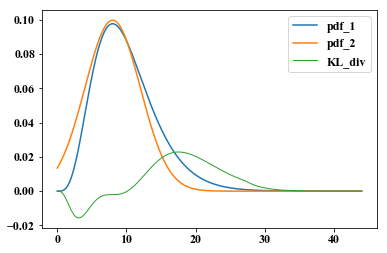

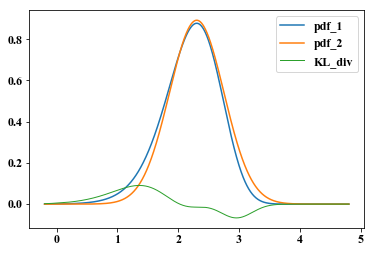

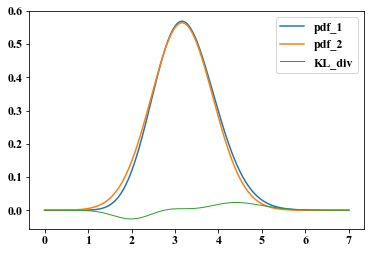

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  30
standard:  2.076527335221883 log:  24.494046177272814 sqrt:  4.294977157177461
seed:  9
k:  1.99
k < 1: not legitimate in standard base
standard:  nan log:  28.793865117509647 sqrt:  21.832351410754864
k:  10


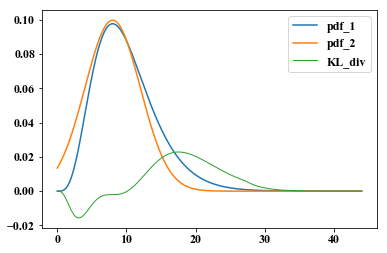

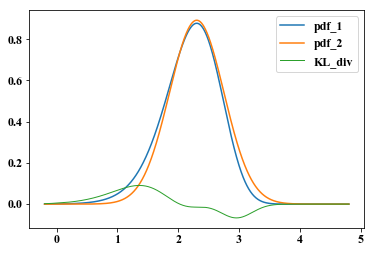

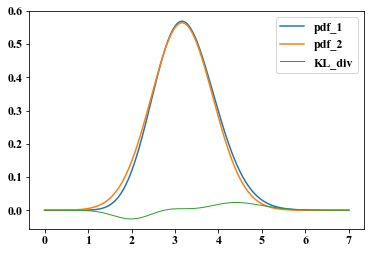

standard:  7.290176645208598 log:  28.30765404495582 sqrt:  8.631042549575731
k:  30
standard:  2.076527335221883 log:  24.494046177272814 sqrt:  4.294977157177461
[        nan 28.79386512 21.83235141]
[ 7.29017665 28.30765404  8.63104255]
[ 2.07652734 24.49404618  4.29497716]


In [116]:
KL_results_s = []
KL_results_m = []
KL_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    KL_s = KL_div_pdf_combinations(params = [k_s])
    KL_m = KL_div_pdf_combinations(params = [k_m], plot=True)
    KL_l = KL_div_pdf_combinations(params = [k_l], plot=False)
    KL_results_s += [KL_s]
    KL_results_m += [KL_m]
    KL_results_l += [KL_l]
    
KL_results_mean_s = np.array(KL_results_s).mean(0)
KL_results_mean_m = np.array(KL_results_m).mean(0)
KL_results_mean_l = np.array(KL_results_l).mean(0)
print(KL_results_mean_s)
print(KL_results_mean_m)
print(KL_results_mean_l)

In [115]:
# normalize to 1 for comparison
KL_results_mean_s[0] = KL_results_mean_s[1:].max()
KL_results_mean_s_normalized = KL_results_mean_s/KL_results_mean_s.max()
KL_results_mean_s_normalized[0] = np.nan
print(KL_results_mean_s_normalized)
print(KL_results_mean_m/KL_results_mean_m.max())
print(KL_results_mean_l/KL_results_mean_l.max())

[       nan 1.         0.75822927]
[0.25753376 1.         0.30490137]
[0.08477682 1.         0.1753478 ]
